<a href="https://colab.research.google.com/github/Dena7Qatry/boston-regression-model-comparison/blob/main/Boston_Housing_Regression_Models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Predicting The median value of owner-occupied homes using Regression models   

Import Necessary Libraries:

In [1]:
import pandas as pd
import numpy
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

##Data loading:

In [2]:
boston=pd.read_csv("/content/drive/MyDrive/BSBI/BSBI intro to AI/Session 5 - Linear & polynomial Regression/boston.csv")
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


Data Exploration:

In [3]:
print(f"The Boston dataset shape:{boston.shape}\n")
print("\nData Types:")
boston.info()

The Boston dataset shape:(506, 14)


Data Types:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [4]:
# Statistics for numerical features
print("Statistics for numerical features:")
boston.describe()

Statistics for numerical features:


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [5]:
numerical_features=['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV']

Data disturbution:

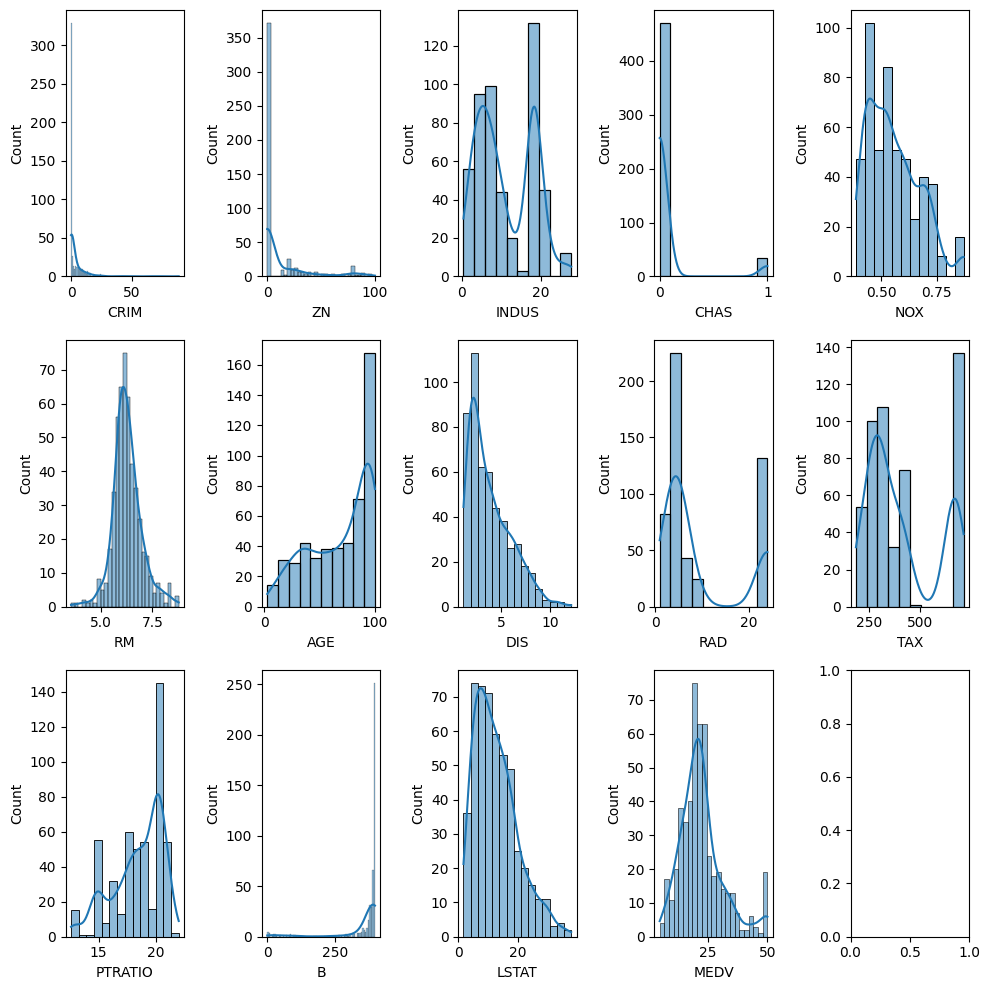

In [6]:
# Histograms visualizations to spot outliers or skew.
fig,ax=plt.subplots(3,5,figsize=(10,10))
for i,subplot in zip(numerical_features,ax.flatten()):
  sns.histplot(data=boston[i],ax=subplot, kde=True)
plt.tight_layout()

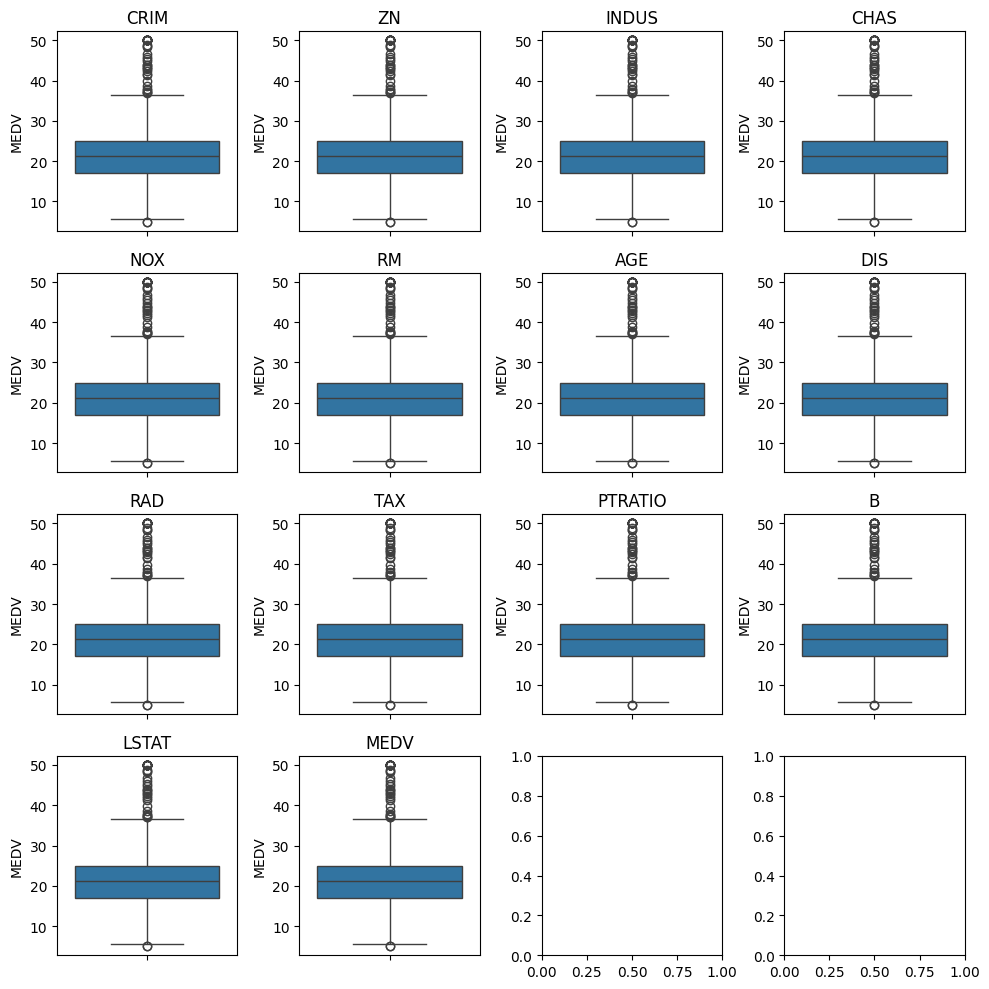

In [7]:
# Box plots visualizations to spot outliers.
fig,ax=plt.subplots(4,4,figsize=(10,10))
for i, subplot in zip(numerical_features,ax.flatten()):
  sns.boxplot(y=boston['MEDV'],ax=subplot)
  subplot.set_title(i)
plt.tight_layout()

Outliers are seen in all the features.

Feature correlation:

Text(0.5, 1.0, 'Correlation Matrix of Features')

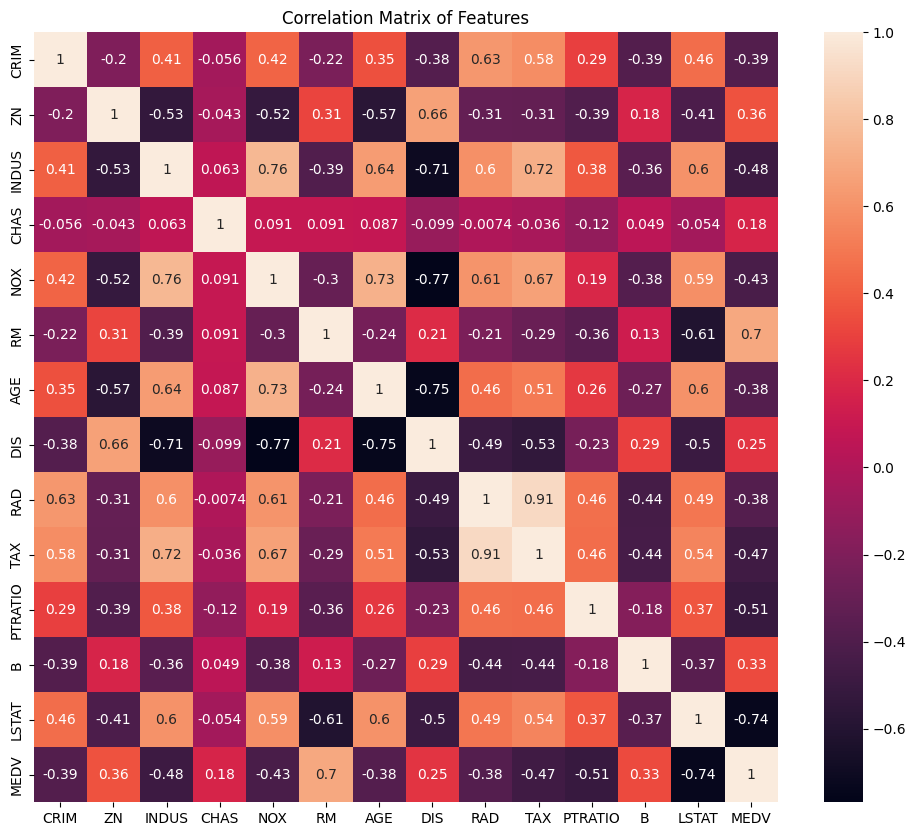

In [8]:
plt.figure(figsize=(12, 10))
sns.heatmap(boston.corr(),annot=True)
plt.title('Correlation Matrix of Features')

## Data Preparation:  




1. Data Cleaning:

In [9]:
#check for null values:
boston.isna().sum()

,0
CRIM,0
ZN,0
INDUS,0
CHAS,0
NOX,0
RM,0
AGE,0
DIS,0
RAD,0
TAX,0


No missing values were found.

 2. Handling ouliers

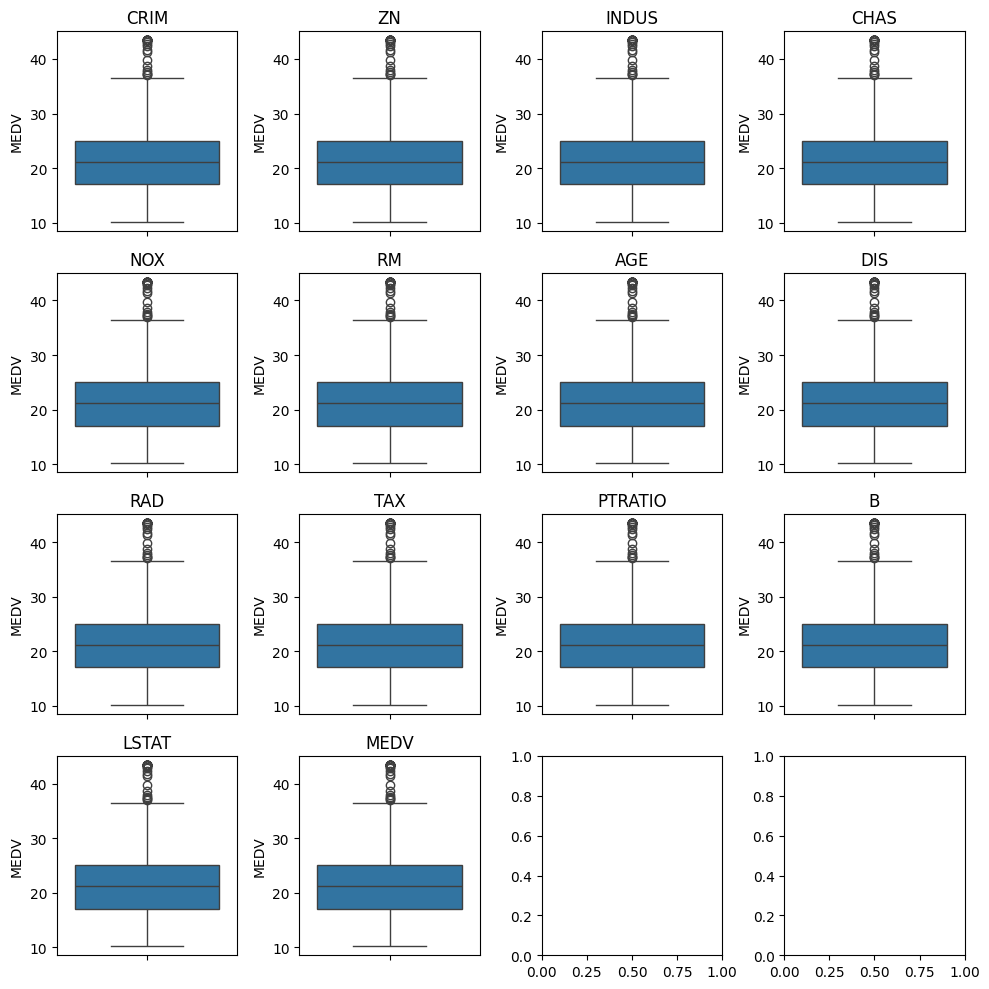

In [10]:
#Handling ouliers using winsorization:
features=['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV']
for col in features:
  upper_limit=boston[col].quantile(0.95)
  lower_limit=boston[col].quantile(0.05)
  boston[col]=boston[col].clip(lower=lower_limit,upper=upper_limit)

# Re-examine the distributions of the features
fig, ax=plt.subplots(4,4,figsize=(10,10))
for i,subplot in zip(numerical_features,ax.flatten()):
  sns.boxplot(y=boston['MEDV'],ax=subplot)
  subplot.set_title(i)
plt.tight_layout()


##Feature scaling:


In [11]:
scaler = StandardScaler()
boston_scaled=boston.copy()
boston_scaled[numerical_features] = scaler.fit_transform(boston[numerical_features])

display(boston_scaled.head())

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,-0.593710,0.309676,-1.326428,-0.272599,-0.119540,0.498204,-0.134753,0.179213,-0.876127,-0.678895,-1.579923,0.460769,-1.140486,0.194255
1,-0.593710,-0.495500,-0.604657,-0.272599,-0.778029,0.232868,0.364050,0.630465,-0.876127,-1.003617,-0.345989,0.460769,-0.508414,-0.095197
2,-0.593710,-0.495500,-0.604657,-0.272599,-0.778029,1.549208,-0.284029,0.630465,-0.876127,-1.003617,-0.345989,0.410645,-1.284829,1.484731
3,-0.592753,-0.495500,-1.346140,-0.272599,-0.883005,1.227015,-0.841087,1.193874,-0.760679,-1.123885,0.098227,0.432813,-1.333830,1.327944
4,-0.584888,-0.495500,-1.346140,-0.272599,-0.883005,1.483736,-0.535251,1.193874,-0.760679,-1.123885,0.098227,0.460769,-1.087307,1.665638


##Data splitting

Split the dataset into training and testing sets with an 80/20 split, using 'MEDV' as the target variable.

In [12]:
x=boston.drop("MEDV",axis=1)
y=boston['MEDV']

In [13]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=10)

##Building & training the regression models:

Train 4 regression models:

* Linear Regression
* polynomial Regression
* Decision Tree Regressor
* Random Forest Regressor

1. Feature engineering:
Generating polynomial features for the training and testing datasets using PolynomialFeatures.


In [14]:
# Create a PolynomialFeatures object with degree 2 and include bias
poly=PolynomialFeatures(degree=2,include_bias=True)

# Fit the PolynomialFeatures object to the training features
poly.fit(x_train)

# Transform both the training and testing features
x_train_poly = poly.transform(x_train)
x_test_poly = poly.transform(x_test)


2. Models training:

In [15]:
# Initialize the models
linear_model=LinearRegression()
polynomial_model = LinearRegression()
tree_model=DecisionTreeRegressor()
forest_model=RandomForestRegressor()

# Train the models
linear_model.fit(x_train,y_train)
polynomial_model.fit(x_train_poly,y_train)
tree_model.fit(x_train,y_train)
forest_model.fit(x_train,y_train)

RandomForestRegressor()

## Model evaluation

Evaluate the trained regression models (Linear Regression, Polynomial Regression, Decision Tree Regressor, and Random Forest Regressor) using:
- Mean Squared Error (MSE)
- Mean Absolute Error (MAE)
- R-squared (R2) score. R2 is named as the coefficient of determination as well


In [16]:
# Predict on the test set
y_predict_linear=linear_model.predict(x_test)
y_predict_Poly=polynomial_model.predict(x_test_poly)
y_predict_tree=tree_model.predict(x_test)
y_predict_forest=forest_model.predict(x_test)

# Evaluate the models
model_evaluations = {}
model_evaluations["Linear Regression"] = {
    "MSE":mean_squared_error(y_test,y_predict_linear),
    "MAE":mean_absolute_error(y_test,y_predict_linear),
    "R2": r2_score(y_test,y_predict_linear),
     }

model_evaluations["polynomial Regression"] = {
    "MSE":mean_squared_error(y_test,y_predict_Poly),
    "MAE":mean_absolute_error(y_test,y_predict_Poly),
    "R2": r2_score(y_test,y_predict_Poly),
     }

model_evaluations["Decision Tree Regressor"] = {
    "MSE":mean_squared_error(y_test,y_predict_tree),
    "MAE":mean_absolute_error(y_test,y_predict_tree),
    "R2": r2_score(y_test,y_predict_tree),
     }

model_evaluations["Random Forest Regressor"] ={
    "MSE":mean_squared_error(y_test,y_predict_forest),
    "MAE":mean_absolute_error(y_test,y_predict_forest),
    "R2": r2_score(y_test,y_predict_forest),
}

# Print the results in a table format
print("{:<25} {:<10} {:<10} {:<10}".format("Model","MSE","MAE","R2"))
print("-"*50)
for model_name,metrics in model_evaluations.items():
  print("{:<25} {:<10.2f} {:<10.2f} {:<10.2f}".format(
      model_name, metrics["MSE"], metrics["MAE"], metrics["R2"]
  ))

Model                     MSE        MAE        R2        
--------------------------------------------------
Linear Regression         23.60      3.48       0.71      
polynomial Regression     10.84      2.44       0.87      
Decision Tree Regressor   22.34      3.08       0.73      
Random Forest Regressor   13.83      2.50       0.83      


## Data visualization

Create visualizations to compare the performance of the four regression models using bar charts for MSE, MAE, and R-squared


Text(0.5, 1.0, 'Comparison of MSE for Regression Models')

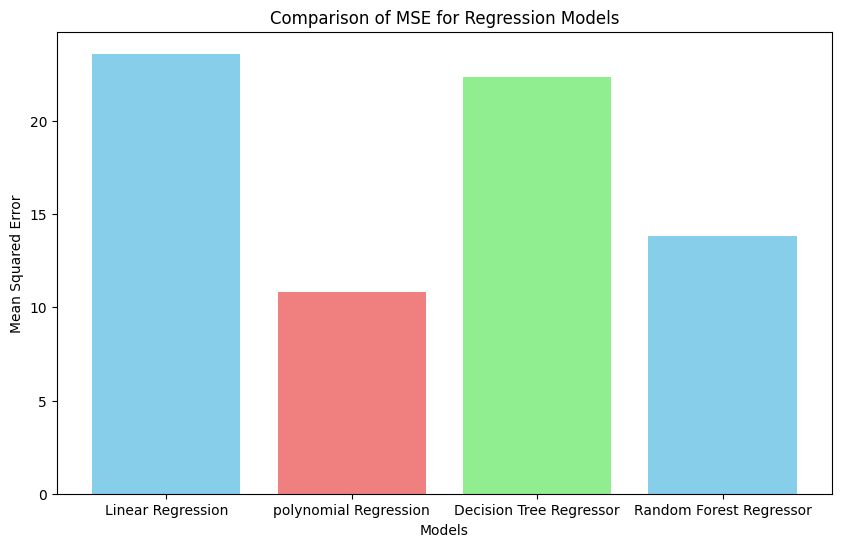

In [18]:
# Data for the bar charts
model_names = list(model_evaluations.keys())
mse_values = [model_evaluations[model]['MSE'] for model in model_names]
mae_values = [model_evaluations[model]['MAE'] for model in model_names]
r2_values = [model_evaluations[model]['R2'] for model in model_names]


# Create the MSE bar chart
plt.figure(figsize=(10, 6))
plt.bar(model_names, mse_values, color=['skyblue', 'lightcoral', 'lightgreen'])
plt.xlabel("Models")
plt.ylabel("Mean Squared Error")
plt.title("Comparison of MSE for Regression Models")

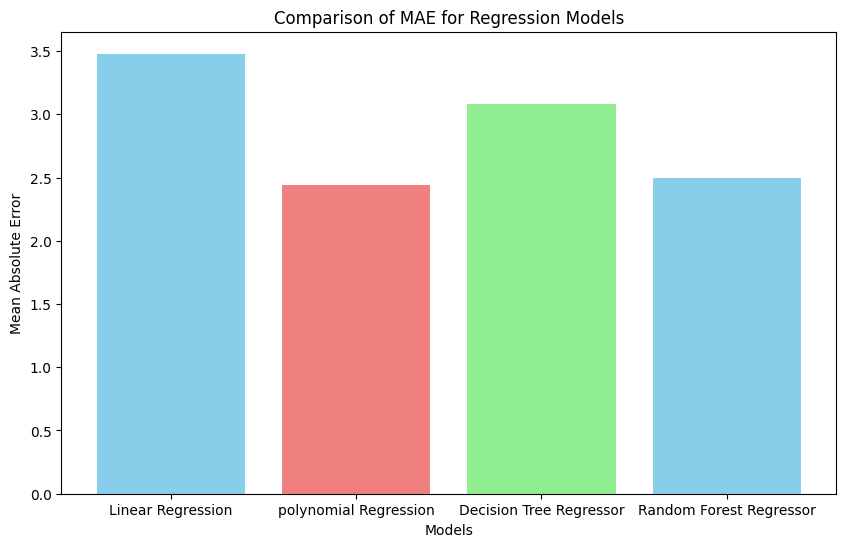

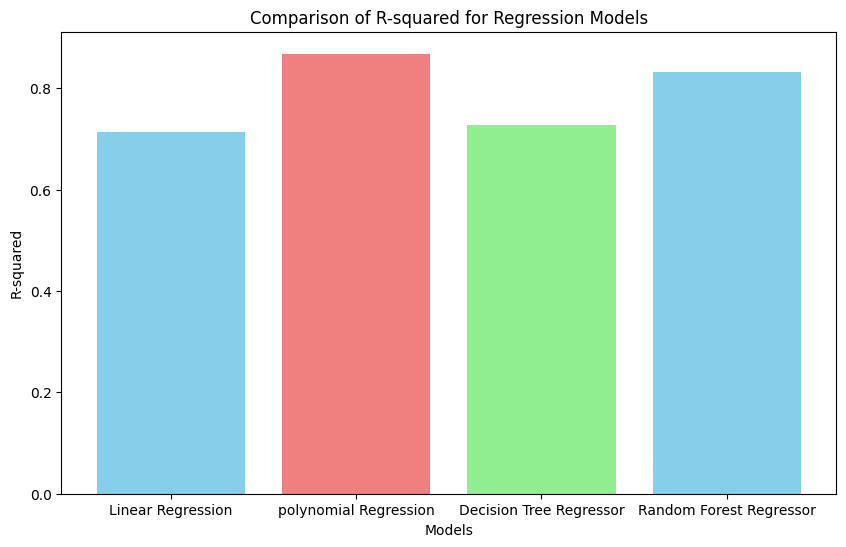

In [19]:
# Create the MAE bar chart
plt.figure(figsize=(10, 6))
plt.bar(model_names, mae_values, color=['skyblue', 'lightcoral', 'lightgreen'])
plt.xlabel("Models")
plt.ylabel("Mean Absolute Error")
plt.title("Comparison of MAE for Regression Models")
plt.savefig('mae_comparison.png')
plt.show()


# Create the R-squared bar chart
plt.figure(figsize=(10, 6))
plt.bar(model_names, r2_values, color=['skyblue', 'lightcoral', 'lightgreen'])
plt.xlabel("Models")
plt.ylabel("R-squared")
plt.title("Comparison of R-squared for Regression Models")
plt.savefig('r2_comparison.png')
plt.show()

## **Summary**:

### **1. Q&A**

The analysis aimed to build and evaluate regression models to predict the median value of owner-occupied homes.  Which model performed best?

- The **Polynomial Regressor** demonstrated the best performance based on the evaluation metrics.

### **2. Data Analysis Key Findings**

* **Polynomial Regression Superiority:** The polynomial regression model achieved the highest R-squared (0.87) and lowest Mean Squared Error (MSE: 10.84), Mean Absolute Error (RMSE: 0.4103), and Mean Absolute Error (MAE: 2.44) compared to the linear, decision tree, and random forest regression models.

* **The Random Forest Regressor** also performed well, with an MSE of 13.83, MAE of 2.50, and R² of 0.83.
* **Linear Regression & Decision tree** exhibited similar performance metrics. while Linear Regression had the lowest R² score (0.71) and the highest MSE (23.60) among the four models, Decision tree had an MSE of 22.34, MAE of 308, and R² of 0.73.
* **Outlier Handling:** Winsorizing was applied to mitigate the influence of outliers.
* **Feature Scaling:**  All numerical features were standardized using `StandardScaler` to ensure that features with larger values do not disproportionately influence the model.


### **3. Insights or Next Steps**

* **Further Feature Engineering:** Explore other feature engineering techniques (e.g., interaction terms, different polynomial degrees, feature selection) to potentially improve model accuracy.
* **Model Tuning:**  Tune the hyperparameters of the polynomial regression model (e.g., polynomial degree) to potentially enhance its performance further. Consider cross-validation techniques for robust hyperparameter optimization.
